# Overview of Iris data & Birthday Problem

## Part1: Scatter plot as well as histogram plot

In this part, I choose the dataset from https://archive.ics.uci.edu/ml/datasets/Iris, where the information of three different Iris classes are included.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/brittt/Desktop/research_ML/iris.data') 

To better understand this dataset, I add the name of columns, which are given by the website.

In [8]:
x = data.iloc[:, [0, 1, 2, 3]].values
print(x)

[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.

In [8]:
# dataset attribute: (from left to right)
# sepal length, sepal width, petal length, petal width, class
data.columns = ['seLength','spWidth','peLength','peWidth','class']
print(data.head())

   seLength  spWidth  peLength  peWidth        class
0       4.9      3.0       1.4      0.2  Iris-setosa
1       4.7      3.2       1.3      0.2  Iris-setosa
2       4.6      3.1       1.5      0.2  Iris-setosa
3       5.0      3.6       1.4      0.2  Iris-setosa
4       5.4      3.9       1.7      0.4  Iris-setosa


In the following parts, I mainly discusse one Iris class called Iris Setosa.

And I choose two attributes of this Iris class to plot the scatterplot as well as the histogram.

From the following plots, we can discover that they are well separated.

### Scatter Plot

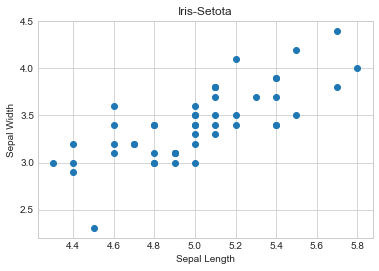

In [13]:
# choose a specific class -- Iris-setosa
data2 = data[data['class'] == 'Iris-setosa']
# Scatterplot -- x: sepal length; y:spWidth 
x = data2['seLength']
y = data2['spWidth']
plt.style.use('seaborn-whitegrid')
plt.scatter(x,y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris-Setota')
plt.show()

### Histogram 
* Histogram of Sepal Length

Text(0.5, 1.0, 'sepal length of Iris-Setota')

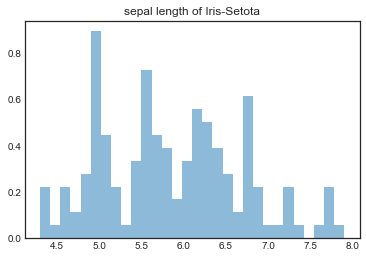

In [35]:
# Histogram
plt.style.use('seaborn-white')
#plt.hist(x)
plt.hist(x,bins=30,density = True, alpha = 0.5)
plt.title('sepal length of Iris-Setota')

* Histogram of Sepal Width

Text(0.5, 1.0, 'sepal width of Iris-Setota')

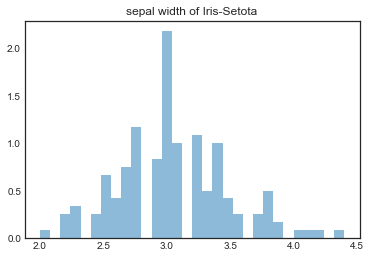

In [33]:
# Histogram
plt.style.use('seaborn-white')
plt.hist(y,bins=30, density = True, alpha = 0.5)
plt.title('sepal width of Iris-Setota')


## Birthday Problem

Suppose there are $k$ students in the class, and let's say the event that two students have the same birthday is a coincidence. 

Then the probability of at least one coincidence is equal to $1 - \frac{365!}{365^k*(365-k)!}$

In [13]:
## Problem 2 -- Birthday problem
# use python to simulate the process
# and calculate the probability that two students having the same birthday
from random import randint
import seaborn as sns

num_birthday = 365
num_trials = 10000

# generate a random list of birthdays from 1 to 365
def birth(k):
    birthdays = []
    for _ in range(k):
        random_birthday = randint(1,num_birthday)
        birthdays.append(random_birthday)
    return birthdays

# check whether in this list has same birthdays
def coincidence(birthdays):
    unique_birth = set(birthdays)
    has_coin = (len(unique_birth) != len(birthdays))
    return has_coin # return true when do have coincidence

def calculate_p(k):
    num_coin = 0
    for _ in range(num_trials):
        birthdays = birth(k)
        has_coin = coincidence(birthdays)
        if has_coin:
            num_coin += 1
    prob = num_coin / num_trials
    return prob

With the above code, we can calculate the probability of having at least two persons have same birthday in a group size of k.

We can also estimate and plot the probabilities for group sizes ranging from 2 to 100. 

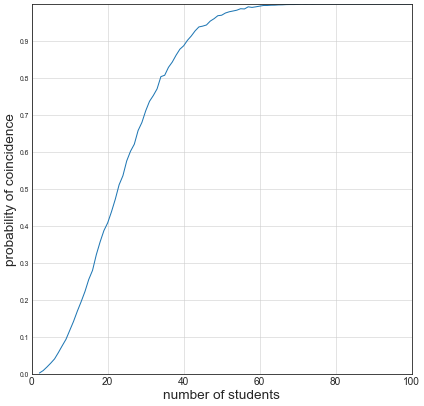

In [24]:
k = range(2, 101)
probs=[calculate_p(i) for i in k]
 
fig, ax = plt.subplots(figsize=(10, 10), dpi=49)
ax.xaxis.set_tick_params(width=5)
ax.yaxis.set_tick_params(width=5)
sns.lineplot(x=k, y=probs)
plt.xticks(fontsize=15)
x_range = np.arange(0, 100, 10)
y_range = np.arange(0, 1, 0.1)
plt.yticks(x_range)
plt.yticks(y_range)
plt.grid()
plt.xlim([0, 100])
plt.ylim([0, 1])
plt.xlabel('number of students', fontsize=20)
plt.ylabel('probability of coincidence', fontsize=20)
plt.show()

In [12]:
print(calculate_p(22))
print(calculate_p(23))

0.4781
0.5103


Via the graph, we can discover that the number of students that has the probability that two of their birthdays are the same is 0.5 when the size is greater than 23. 

I can also prove this in another way as below.

In [28]:
import math
def student_size(p):
    return math.ceil(math.sqrt(2 * 365 *math.log(1/(1-p))));

print(student_size(0.50))

23


That is, when there are 23 students in the class, the probability is 0.5. 

## The Central Limit Theorem (CLT)

In this problem, I pick the random variable X from the coin flips. And I am going to simulate the process of flipping a fair coin, and denote "0" to be "tails", while "1" to be "heads".

In [3]:
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('classic')
plt.rc('figure', figsize = (6, 4.5))
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)

# simulate the coin flips 
# 0 represents 'tails', 1 represents 'heads'
n_flips = 100 #number of coin flips
coins = stats.randint.rvs(0, 2, size=n_flips)
print(coins)

[1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1
 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1]


Average & Z-score

In [4]:
avg = np.mean(coins)
z = stats.zscore(coins)
print(avg)
print(z)

0.44
[ 1.12815215  1.12815215  1.12815215 -0.88640526 -0.88640526 -0.88640526
  1.12815215  1.12815215 -0.88640526 -0.88640526 -0.88640526  1.12815215
  1.12815215 -0.88640526 -0.88640526 -0.88640526 -0.88640526  1.12815215
  1.12815215 -0.88640526  1.12815215 -0.88640526 -0.88640526  1.12815215
 -0.88640526 -0.88640526  1.12815215 -0.88640526  1.12815215 -0.88640526
  1.12815215  1.12815215 -0.88640526 -0.88640526 -0.88640526  1.12815215
 -0.88640526 -0.88640526 -0.88640526  1.12815215 -0.88640526 -0.88640526
 -0.88640526  1.12815215 -0.88640526  1.12815215 -0.88640526 -0.88640526
 -0.88640526 -0.88640526 -0.88640526 -0.88640526  1.12815215  1.12815215
 -0.88640526 -0.88640526 -0.88640526 -0.88640526 -0.88640526 -0.88640526
  1.12815215 -0.88640526  1.12815215 -0.88640526 -0.88640526  1.12815215
 -0.88640526 -0.88640526  1.12815215 -0.88640526  1.12815215  1.12815215
 -0.88640526  1.12815215  1.12815215  1.12815215  1.12815215  1.12815215
 -0.88640526  1.12815215  1.12815215  1.128152

#### Simulating k trials of 100 coin flip experiments 

In [5]:
#number of experiments to simulate
k = 10000
results = np.zeros(k)
mean = np.zeros(k)
for i in range(k):
    # each experiment consists of 100 coin flips
    results[i] = np.sum(stats.randint.rvs(0, 2, size=n_flips))
    mean[i] = np.mean(stats.randint.rvs(0, 2, size=n_flips))
print(results)
print(mean)
print(len(mean))

[56. 53. 56. ... 51. 50. 53.]
[0.43 0.41 0.45 ... 0.52 0.42 0.46]
10000


#### Plot the histogram

With the list of results and list of means, I can first plot the histograms of number of heads.

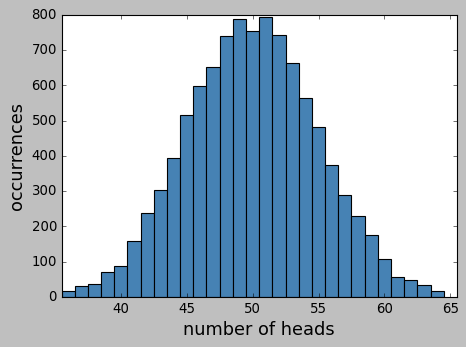

In [6]:
num_bins = int(64.5 - 35.5)
plt.figure()
plt.xlabel("number of heads")
plt.ylabel("occurrences")
out = plt.hist(results, num_bins, [35.5,64.5],color='steelblue')
plt.xlim(35.5,65.5);

Then, due to Central Limit Theorem, I would further plot the distribution of the sample mean.
It's the distribution of the sample mean that approaches the normal distribution.

Notice that for a fair coin, the probability of getting a head("1") is 0.5, which is the same of getting a tail("0"), thus the mean of this distribution is 0.5, and the standard deviation of this parent distribution is also 0.5.

And the following calculated values prove our prediction.

In [7]:
#sample mean
sample_mean = np.mean(mean)
#sample standard deviation
sample_std = np.std(mean)
#predicted std
predicted_std = (1/2)/np.sqrt(n_flips)

print("sample mean = ", sample_mean)
print("sample std = ", sample_std)
print("predicted std = ", predicted_std)

sample mean =  0.49982999999999994
sample std =  0.0504417594855691
predicted std =  0.05


The histogram below plots the results for the average number of heads in each trial, that is, dividing the number of heads by the number of coin-flips in a trial (in this case 100).

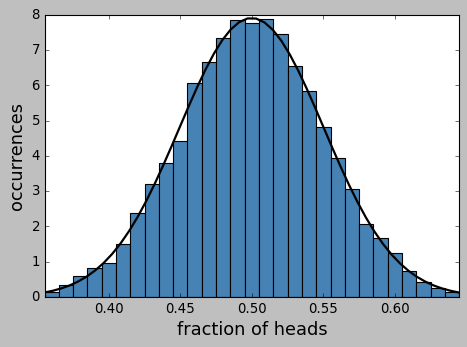

In [8]:
low = 35.5/n_flips
high = 64.5/n_flips
plt.figure()
plt.xlabel("fraction of heads")
plt.ylabel("occurrences")
h_out = plt.hist(mean, num_bins, [low,high],density = True, color='steelblue')
plt.xlim(low,high);

mu, std = norm.fit(mean)
x = np.linspace(low,high)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()